<a href="https://colab.research.google.com/github/lauramoraes/Text_Mining/blob/master/2%20-%20Aquisi%C3%A7%C3%A3o%20de%20Dados%20da%20Web.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aquisição de Dados

O primeiro processo da Mineração de Texto, é garantir que temos os dados necessários para análise. A mineração de texto é muito dinâmica e provavelmente temos que montar um **fluxo contínuo** de aquisição dos dados necessário. Neste notebook vamos exemplificar como recuperar dados de uma página HTML e estruturá-los.

### Importando bibliotecas a serem usadas

In [1]:
install.packages('rvest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
suppressMessages(suppressWarnings(library(rvest)))
suppressMessages(suppressWarnings(library(dplyr)))
suppressMessages(suppressWarnings(library('ggplot2')))

### Download dos dados
Neste exemplo vamos recuperar informações sobre os filmes lançados em 2018 de acordo com o IMDb: https://www.imdb.com/search/title?count=100&release_date=2018,2018&title_type=feature

Retirado de: https://www.analyticsvidhya.com/blog/2017/03/beginners-guide-on-web-scraping-in-r-using-rvest-with-hands-on-knowledge/

In [0]:
#Specifying the url for desired website to be scraped
url <- 'http://www.imdb.com/search/title?count=100&release_date=2018,2018&title_type=feature'

In [0]:
#Reading the HTML code from the website
webpage <- read_html(url)

Informações que queremos estruturar:


1.   Rank: A posição do filme entre 1 e 100 na lista dos 100 filmes melhores avaliados em 2018.
2. Título
3. Descrição do filme
4. Duração
5. Gênero
6. Nota: nota do filme no IMDb
8. Quantidade de votos
10. Diretor: diretor principal do filme
11. Ator principal do filme


### 1) Começando pelo rank

In [6]:
#Using CSS selectors to scrap the rankings section
rank_data_html <- html_nodes(webpage,'.text-primary')

#Converting the ranking data to text
rank_data <- html_text(rank_data_html)

#Let's have a look at the rankings
head(rank_data)

[1] "1." "2." "3." "4." "5." "6."

Vamos processá-la para limpá-la

In [7]:
#Data-Preprocessing: Converting rankings to numerical
rank_data<-as.numeric(rank_data)

#Let's have another look at the rankings
head(rank_data)

[1] 1 2 3 4 5 6

### 2) Título

In [8]:
#Using CSS selectors to scrap the title section
title_data_html <- html_nodes(webpage,'.lister-item-header a')

#Converting the title data to text
title_data <- html_text(title_data_html)

#Let's have a look at the title
head(title_data)

[1] "The Perfection"                    "Avengers: Infinity War"           
[3] "Bohemian Rhapsody"                 "Spider-Man: Into the Spider-Verse"
[5] "Aquaman"                           "Halloween"

### 3) Descrição

In [9]:
#Using CSS selectors to scrap the description section
description_data_html <- html_nodes(webpage,'.ratings-bar+ .text-muted')

#Converting the description data to text
description_data <- html_text(description_data_html)

#Let's have a look at the description data
head(description_data)

[1] "\n    When troubled musical prodigy Charlotte (Allison Williams) seeks out Elizabeth (Logan Browning), the new star pupil of her former school, the encounter sends both musicians down a sinister path with shocking consequences."
[2] "\n    The Avengers and their allies must be willing to sacrifice all in an attempt to defeat the powerful Thanos before his blitz of devastation and ruin puts an end to the universe."                                             
[3] "\n    The story of the legendary rock band Queen and lead singer Freddie Mercury, leading up to their famous performance at Live Aid (1985)."                                                                                       
[4] "\n    Teen Miles Morales becomes Spider-Man of his reality, crossing his path with five counterparts from other dimensions to stop a threat for all realities."                                                                     
[5] "\n    Arthur Curry, the human-born heir to the underwater kingdom of Atlantis, goes on a quest to prevent a war between the worlds of ocean and land."                                                                              
[6] "\n    Laurie Strode confronts her long-time foe Michael Myers, the masked figure who has haunted her since she narrowly escaped his killing spree on Halloween night four decades ago."

In [10]:
#Data-Preprocessing: removing '\n'
description_data<-gsub("\n","",description_data)

#Let's have another look at the description data 
head(description_data)

[1] "    When troubled musical prodigy Charlotte (Allison Williams) seeks out Elizabeth (Logan Browning), the new star pupil of her former school, the encounter sends both musicians down a sinister path with shocking consequences."
[2] "    The Avengers and their allies must be willing to sacrifice all in an attempt to defeat the powerful Thanos before his blitz of devastation and ruin puts an end to the universe."                                             
[3] "    The story of the legendary rock band Queen and lead singer Freddie Mercury, leading up to their famous performance at Live Aid (1985)."                                                                                       
[4] "    Teen Miles Morales becomes Spider-Man of his reality, crossing his path with five counterparts from other dimensions to stop a threat for all realities."                                                                     
[5] "    Arthur Curry, the human-born heir to the underwater kingdom of Atlantis, goes on a quest to prevent a war between the worlds of ocean and land."                                                                              
[6] "    Laurie Strode confronts her long-time foe Michael Myers, the masked figure who has haunted her since she narrowly escaped his killing spree on Halloween night four decades ago."

### 4) Duração

In [11]:
#Using CSS selectors to scrap the Movie runtime section
runtime_data_html <- html_nodes(webpage,'.text-muted .runtime')

#Converting the runtime data to text
runtime_data <- html_text(runtime_data_html)

#Let's have a look at the runtime
head(runtime_data)

[1] "90 min"  "149 min" "134 min" "117 min" "143 min" "106 min"

In [12]:
#Data-Preprocessing: removing mins and converting it to numerical

runtime_data<-gsub(" min","",runtime_data)
runtime_data<-as.numeric(runtime_data)

#Let's have another look at the runtime data
head(runtime_data)

[1]  90 149 134 117 143 106

### 5) Gênero

In [13]:
#Using CSS selectors to scrap the Movie genre section
genre_data_html <- html_nodes(webpage,'.genre')

#Converting the genre data to text
genre_data <- html_text(genre_data_html)

#Let's have a look at the runtime
head(genre_data)

[1] "\nDrama, Horror, Thriller            "     
[2] "\nAction, Adventure, Sci-Fi            "   
[3] "\nBiography, Drama, Music            "     
[4] "\nAnimation, Action, Adventure            "
[5] "\nAction, Adventure, Fantasy            "  
[6] "\nHorror, Thriller            "

In [14]:
#Data-Preprocessing: removing \n
genre_data<-gsub("\n","",genre_data)

#Data-Preprocessing: removing excess spaces
genre_data<-gsub(" ","",genre_data)

#taking only the first genre of each movie
genre_data<-gsub(",.*","",genre_data)

#Convering each genre from text to factor
genre_data<-as.factor(genre_data)

#Let's have another look at the genre data
head(genre_data)

[1] Drama     Action    Biography Animation Action    Horror   
9 Levels: Action Adventure Animation Biography Comedy Crime Drama ... Horror

### 6) Notas

In [15]:
#Using CSS selectors to scrap the IMDB rating section
rating_data_html <- html_nodes(webpage,'.ratings-imdb-rating strong')

#Converting the ratings data to text
rating_data <- html_text(rating_data_html)

#Let's have a look at the ratings
head(rating_data)

[1] "6.2" "8.5" "8.1" "8.5" "7.1" "6.6"

In [17]:
#Data-Preprocessing: converting ratings to numerical
rating_data<-as.numeric(rating_data)

#Let's have another look at the ratings data
head(rating_data)

[1] 6.2 8.5 8.1 8.5 7.1 6.6

### 7) Votos

In [18]:
#Using CSS selectors to scrap the votes section
votes_data_html <- html_nodes(webpage,'.sort-num_votes-visible span:nth-child(2)')

#Converting the votes data to text
votes_data <- html_text(votes_data_html)

#Let's have a look at the votes data
head(votes_data)

[1] "10,790"  "667,444" "342,646" "208,023" "260,421" "87,678"

In [19]:
#Data-Preprocessing: removing commas
votes_data<-gsub(",","",votes_data)

#Data-Preprocessing: converting votes to numerical
votes_data<-as.numeric(votes_data)

#Let's have another look at the votes data
head(votes_data)

[1]  10790 667444 342646 208023 260421  87678

### 8) Diretor

In [20]:
#Using CSS selectors to scrap the directors section
directors_data_html <- html_nodes(webpage,'.text-muted+ p a:nth-child(1)')

#Converting the directors data to text
directors_data <- html_text(directors_data_html)

#Let's have a look at the directors data
head(directors_data)

[1] "Richard Shepard"    "Anthony Russo"      "Bryan Singer"      
[4] "Bob Persichetti"    "James Wan"          "David Gordon Green"

In [22]:
#Data-Preprocessing: converting directors data into factors
directors_data<-as.factor(directors_data)
#Let's have a look at the directors data
head(directors_data)

[1] Richard Shepard    Anthony Russo      Bryan Singer       Bob Persichetti   
[5] James Wan          David Gordon Green
100 Levels: Adam McKay Alex Garland Aneesh Chaganty ... Zach Lipovsky

### 9) Ator:

In [24]:
#Using CSS selectors to scrap the actors section
actors_data_html <- html_nodes(webpage,'.lister-item-content .ghost+ a')

#Converting the gross actors data to text
actors_data <- html_text(actors_data_html)

#Let's have a look at the actors data
head(actors_data)

#Data-Preprocessing: converting actors data into factors
actors_data<-as.factor(actors_data)


#Let's have a look at the actors data
head(actors_data)

[1] "Allison Williams"  "Robert Downey Jr." "Rami Malek"       
[4] "Shameik Moore"     "Jason Momoa"       "Jamie Lee Curtis"

[1] Allison Williams  Robert Downey Jr. Rami Malek        Shameik Moore    
[5] Jason Momoa       Jamie Lee Curtis 
97 Levels: Adriana Ugarte Ah-in Yoo Alden Ehrenreich ... Zain Al Rafeea

## Estruturando os dados

In [25]:
#Combining all the lists to form a data frame
movies_df<-data.frame(Rank = rank_data, Title = title_data, 
                      Description = description_data, Runtime = runtime_data,
                      Genre = genre_data, Rating = rating_data,
                      Votes = votes_data, Director = directors_data, 
                      Actor = actors_data)

head(movies_df)

Rank,Title,Description,Runtime,Genre,Rating,Votes,Director,Actor
<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,The Perfection,"When troubled musical prodigy Charlotte (Allison Williams) seeks out Elizabeth (Logan Browning), the new star pupil of her former school, the encounter sends both musicians down a sinister path with shocking consequences.",90,Drama,6.2,10790,Richard Shepard,Allison Williams
2,Avengers: Infinity War,The Avengers and their allies must be willing to sacrifice all in an attempt to defeat the powerful Thanos before his blitz of devastation and ruin puts an end to the universe.,149,Action,8.5,667444,Anthony Russo,Robert Downey Jr.
3,Bohemian Rhapsody,"The story of the legendary rock band Queen and lead singer Freddie Mercury, leading up to their famous performance at Live Aid (1985).",134,Biography,8.1,342646,Bryan Singer,Rami Malek
4,Spider-Man: Into the Spider-Verse,"Teen Miles Morales becomes Spider-Man of his reality, crossing his path with five counterparts from other dimensions to stop a threat for all realities.",117,Animation,8.5,208023,Bob Persichetti,Shameik Moore
5,Aquaman,"Arthur Curry, the human-born heir to the underwater kingdom of Atlantis, goes on a quest to prevent a war between the worlds of ocean and land.",143,Action,7.1,260421,James Wan,Jason Momoa
6,Halloween,"Laurie Strode confronts her long-time foe Michael Myers, the masked figure who has haunted her since she narrowly escaped his killing spree on Halloween night four decades ago.",106,Horror,6.6,87678,David Gordon Green,Jamie Lee Curtis


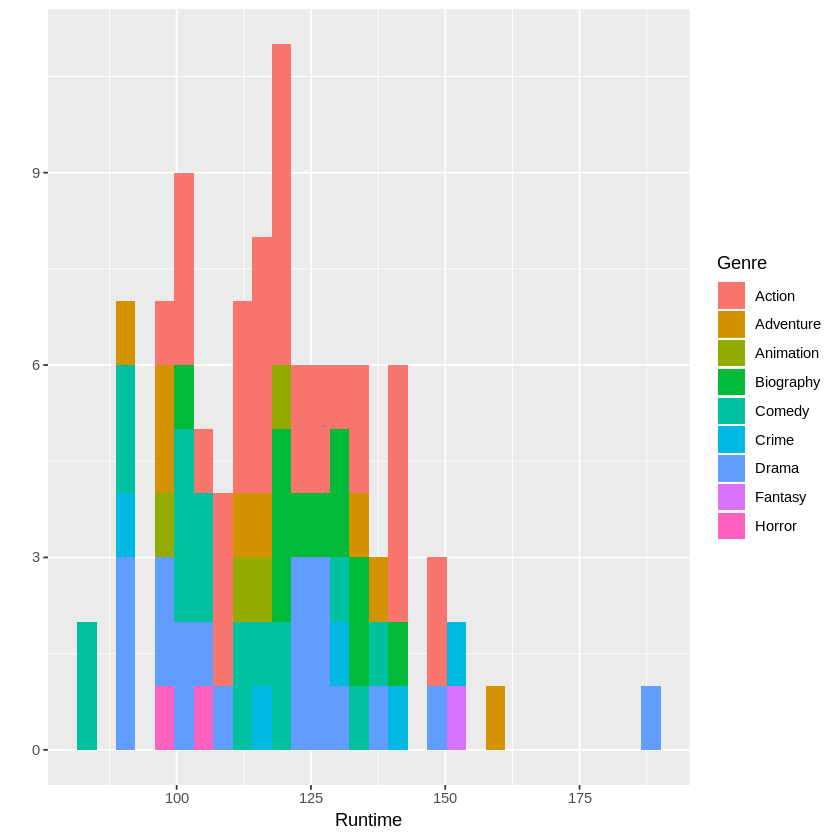

In [27]:
qplot(data = movies_df,Runtime,fill = Genre,bins = 30)

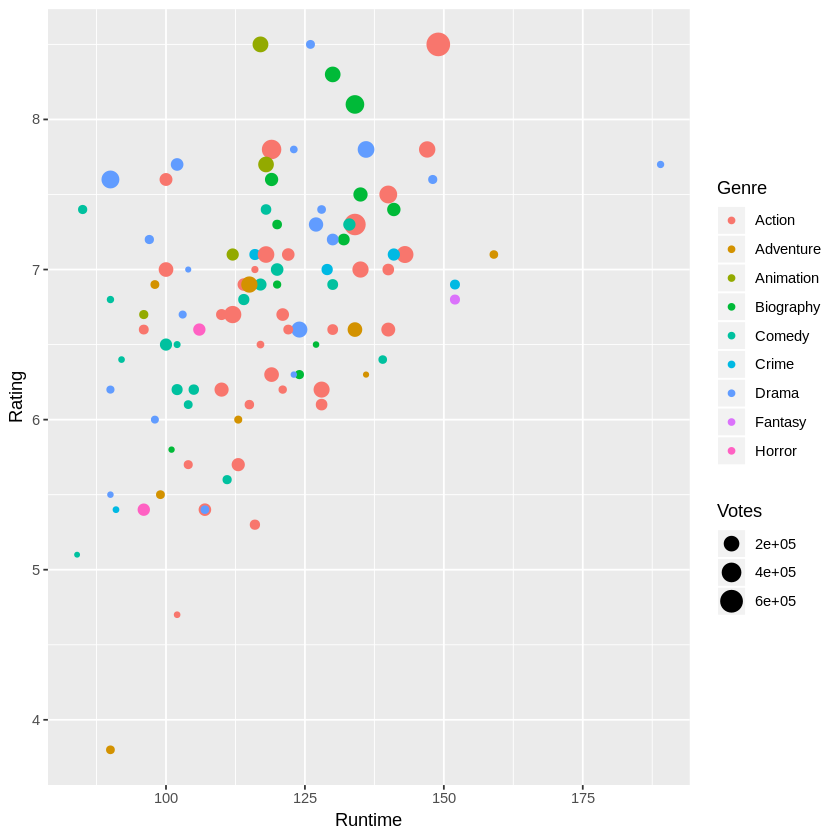

In [28]:
ggplot(movies_df,aes(x=Runtime,y=Rating))+
geom_point(aes(size=Votes,col=Genre))